In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [3]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams']).drop(['code','strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away','team_division','unavailable','pulse_id'], axis=1)

In [5]:
teams_df.columns

Index(['draw', 'form', 'id', 'loss', 'name', 'played', 'points', 'position',
       'short_name', 'strength', 'win'],
      dtype='object')

In [6]:
teams = teams_df[['id','name','short_name','strength']]
teams.head(5)

,id,name,short_name,strength
0,1,Arsenal,ARS,4
1,2,Aston Villa,AVL,3
2,3,Brentford,BRE,2
3,4,Brighton,BHA,3
4,5,Burnley,BUR,2


In [7]:
#elements_df.columns

In [8]:
players = elements_df[['first_name','second_name','id','now_cost','minutes','total_points','points_per_game','form','value_form','goals_scored','assists',
                       'clean_sheets','bonus','team', 'element_type']]
players.columns = ['Name_First','Name','id','Cost','Min','P','PPG','F','VF','G','A','CS','B','Team','Pos']
players.loc[:,'Cost'] = players.loc[:,'Cost']/10
players.loc[:,'PPG'] = players['PPG'].astype('float')
players.loc[:,'Pos'] = players['Pos'].map(elements_types_df.set_index('id').singular_name_short)
players.loc[:,'Team'] = players['Team'].map(teams.set_index('id').short_name)
players.head(5)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos
0,Bernd,Leno,1,4.5,270,4,1.3,0.0,0.0,0,0,0,0,ARS,GKP
1,Rúnar Alex,Rúnarsson,2,4.0,0,0,0.0,0.0,0.0,0,0,0,0,ARS,GKP
2,Willian,Borges Da Silva,3,6.3,0,0,0.0,0.0,0.0,0,0,0,0,ARS,MID
3,Pierre-Emerick,Aubameyang,4,9.6,1036,44,3.1,0.0,0.0,4,1,6,7,ARS,FWD
4,Cédric,Soares,5,4.2,739,19,1.9,2.2,0.5,0,0,2,0,ARS,DEF


## Some Info, can sort by form, PPG, position, etc.

In [9]:
#[players['Team']=='LIV'][players['Pos']=='DEF']
#players[players['Min']>400].sort_values('PPG', ascending=False).head(20)
players['PP90'] = 90*round(players['P']/(players['Min']+1),3)
players[(players['Min']>400) & (players['Cost']<8)].sort_values('F', ascending=False).head(20)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos,PP90
56,Matthew,Cash,44,5.2,2477,118,4.2,9.8,1.9,3,3,11,11,AVL,DEF,4.32
208,Kai,Havertz,141,7.8,1300,85,4.2,8.8,1.1,6,3,9,5,CHE,MID,5.85
84,Ivan,Toney,78,6.6,2098,107,4.5,7.5,1.1,11,2,5,16,BRE,FWD,4.59
374,Andrew,Robertson,234,7.2,1934,142,6.5,7.4,1.0,1,11,13,19,LIV,DEF,6.57
593,Dejan,Kulusevski,701,6.2,590,45,5.6,7.0,1.1,2,5,4,2,TOT,MID,6.84
371,Alisson,Ramses Becker,231,6.0,2430,138,5.1,7.0,1.2,0,1,16,12,LIV,GKP,5.13
369,Virgil,van Dijk,229,6.8,2430,150,5.6,6.8,1.0,3,2,17,11,LIV,DEF,5.58
569,Matt,Doherty,360,4.8,671,50,4.2,6.7,1.4,1,4,3,5,TOT,DEF,6.66
364,Joel,Matip,224,4.9,2070,113,4.9,6.6,1.3,1,2,13,8,LIV,DEF,4.95
212,Trevoh,Chalobah,527,4.7,1177,83,4.9,6.5,1.4,3,1,7,9,CHE,DEF,6.30


In [10]:
players[(players['Team']=='WOL') & (players['P']>50)]

,Name_First,Name,id,Cost,Min,P,PPG,F,VF,G,A,CS,B,Team,Pos,PP90
676,João Filipe Iria,Santos Moutinho,426,4.9,2166,79,3.0,1.8,0.4,2,1,11,7,WOL,MID,3.24
679,Conor,Coady,429,4.8,2596,122,4.2,4.3,0.9,3,0,11,9,WOL,DEF,4.23
680,Raúl,Jiménez,430,7.6,2102,89,3.3,3.0,0.4,6,4,11,11,WOL,FWD,3.78
681,Romain,Saïss,431,5.0,2378,105,3.9,2.8,0.6,2,0,11,6,WOL,DEF,3.96
682,Fernando,Marçal,432,4.2,1273,60,3.8,1.8,0.4,0,2,6,4,WOL,DEF,4.23
684,Leander,Dendoncker,434,4.7,1316,55,2.4,1.7,0.4,1,3,5,3,WOL,MID,3.78
686,Rúben Diogo,da Silva Neves,436,5.3,2244,85,3.1,4.8,0.9,4,2,9,7,WOL,MID,3.42
687,Nélson,Cabral Semedo,437,4.8,1989,91,4.0,1.7,0.4,0,1,9,9,WOL,DEF,4.14
688,Daniel,Castelo Podence,438,5.5,1316,61,2.7,4.0,0.7,2,2,8,2,WOL,MID,4.14
689,Max,Kilman,439,4.6,2508,102,3.6,2.3,0.5,1,1,10,5,WOL,DEF,3.69


In [11]:
teams['Points']= teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sum())

teams['HS'] = teams['short_name'].map(lambda x: players[players['Team']==x].sort_values('P',ascending=False)['Name'].iloc[0])
teams['HS_pts'] = teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sort_values(ascending=False).iloc[0])
teams['H_frac'] = teams['HS_pts']/teams['Points']

teams['HS2'] = teams['short_name'].map(lambda x: players[players['Team']==x].sort_values('P',ascending=False)['Name'].iloc[1])
teams['HS2_pts'] = teams['short_name'].map(lambda x: players[players['Team']==x]['P'].sort_values(ascending=False).iloc[1])
teams['H2_frac'] = teams['HS2_pts']/teams['Points']

teams['G'] = teams['short_name'].map(lambda x: players[players['Team']==x]['G'].sum())
teams['A'] = teams['short_name'].map(lambda x: players[players['Team']==x]['A'].sum())
teams['CS'] = teams['short_name'].map(lambda x: players[players['Team']==x]['CS'].max())
teams['TS'] = teams['short_name'].map(lambda x: players[players['Team']==x]['G'].max())
teams['TA'] = teams['short_name'].map(lambda x: players[players['Team']==x]['A'].max())

players['G+A']=players['G']+players['A']
teams.head(5)

C:\Users\matst\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,name,short_name,strength,Points,HS,HS_pts,H_frac,HS2,HS2_pts,H2_frac,G,A,CS,TS,TA
0,1,Arsenal,ARS,4,1288,Saka,127,0.098602,Ramsdale,117,0.090839,42,37,12,9,8
1,2,Aston Villa,AVL,3,1151,Cash,118,0.102520,Martínez,100,0.086881,37,35,11,7,5
2,3,Brentford,BRE,2,1045,Toney,107,0.102392,Jansson,86,0.082297,31,25,8,11,4
3,4,Brighton,BHA,3,1023,Maupay,94,0.091887,Sánchez,91,0.088954,24,24,7,8,4
4,5,Burnley,BUR,2,881,Pope,91,0.103292,Mee,74,0.083995,17,20,7,6,4


## Fraction of Team points scored by Highest Scorer

e.g. Who stands out as big point provider for a team? Does a team rely on one person more than others?
Chelsea clearly very spread out points wise, anyone can return. On the other hand, Dennis and Salah are big carries for their team.

### Also fraction scored by highest for G+A, G, and FPL points

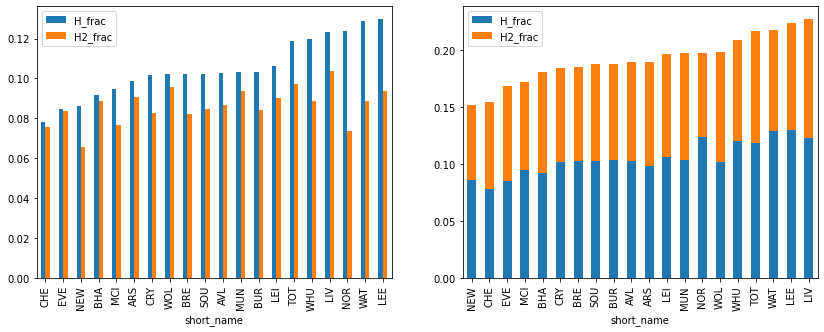

1 :  Dias Belloli                                      Salah  &  Alexander-Arnold
2 :  Dennis                                            Dias Belloli  &  James
3 :  Pukki                                             Dennis  &  King
4 :  Salah                                             Son  &  Kane
5 :  Bowen                                             Bowen  &  Antonio
6 :  Son                                               Malheiro de Sá  &  Coady
7 :  Maddison                                          Pukki  &  Krul


In [12]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
teams.sort_values('H_frac').plot.bar('short_name',y=['H_frac','H2_frac'], ax=ax[0])

teams.iloc[(teams['H_frac']+teams["H2_frac"]).sort_values().index].plot.bar('short_name',y=['H_frac','H2_frac'],stacked=True, ax=ax[1])
plt.show()

for i in range(7):
    name = teams.sort_values('H_frac', ascending=False)['HS'].iloc[i]
    print(i+1 , ': ' ,name , end = "")
    print((50-len(name))*' ', end = '')
    names = teams.iloc[(teams['H_frac']+teams["H2_frac"]).sort_values(ascending=False).index][['HS','HS2']].iloc[i]
    print(names[0], ' & ', names[1])

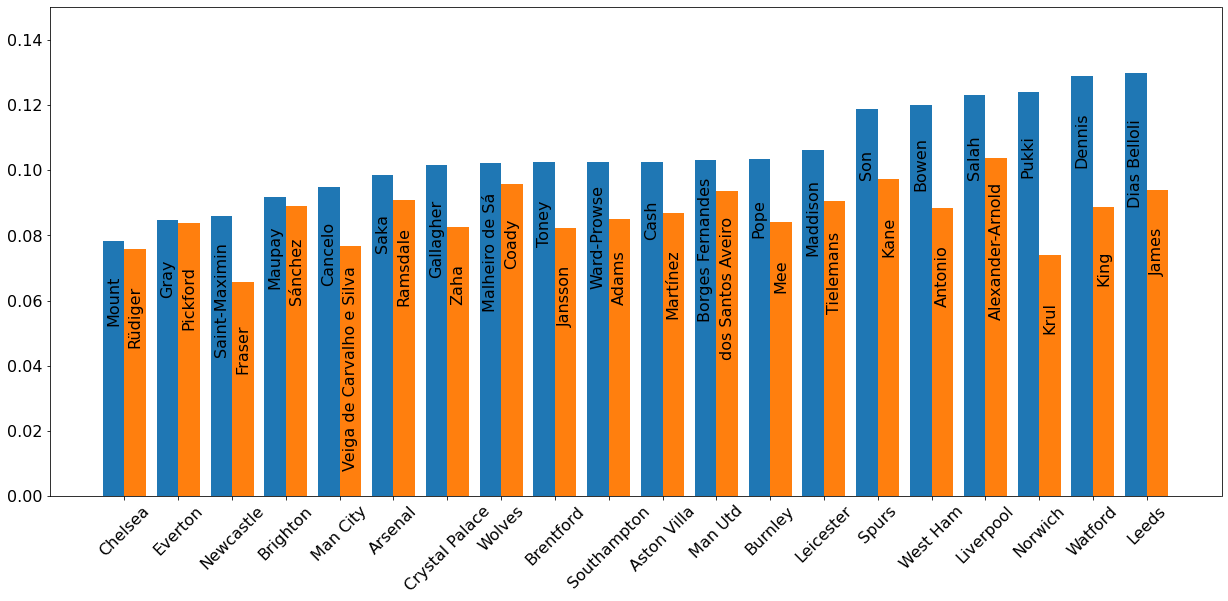

In [205]:
fig,ax = plt.subplots(figsize=(21,9))
vals = teams.sort_values('H_frac')
width = 0.40
x_s = np.arange(0,len(vals['name']))

rec1 = ax.bar(x_s-width/2,vals['H_frac'],width)
rec2 = ax.bar(x_s+width/2,vals['H2_frac'],width)

ax.set_ylim(0,0.15)
ax.set_xticks(x_s)
ax.set_xticklabels(vals['name'].values,rotation=45,fontsize=16)
ax.tick_params('y',labelsize=16)


i=0
for rect in rec1:

    height = rect.get_height()
    ax.annotate('{}'.format(vals['HS'].values[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -50-7*len(vals['HS'].values[i])),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',rotation=90,color='black',fontsize=16)
    i += 1
    
i=0
for rect in rec2:

    height = rect.get_height()
    ax.annotate('{}'.format(vals['HS2'].values[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -50-7*len(vals['HS2'].values[i])),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',rotation=90,fontsize=16)
    i += 1

plt.savefig('FractionOfFPLPoints')
plt.show()

In [13]:
print('Fraction of Goals+Assists of Team best player has')
for t in teams.sort_values('G', ascending=False)['short_name']:
    print(t, ": ", players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['Name'],
          ": {0:.2f} ({1}/{2})".format(players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['G+A']/teams.set_index('short_name').loc[t,:][['G','A']].sum(),
                                       players[players['Team']==t][['Name','G+A']].sort_values('G+A',ascending=False).iloc[0]['G+A'],
                              teams.set_index('short_name').loc[t,:][['G','A']].sum()))

Fraction of Goals+Assists of Team best player has
LIV :  Salah : 0.22 (31/139)
MCI :  Mahrez : 0.12 (15/121)
CHE :  Mount : 0.15 (16/109)
WHU :  Bowen : 0.23 (21/93)
MUN :  Borges Fernandes : 0.17 (15/90)
ARS :  Saka : 0.18 (14/79)
LEI :  Maddison : 0.17 (13/75)
CRY :  Gallagher : 0.19 (14/73)
TOT :  Son : 0.23 (18/80)
AVL :  Ings : 0.14 (10/72)
NEW :  Saint-Maximin : 0.15 (10/66)
SOU :  Adams : 0.17 (11/64)
LEE :  Dias Belloli : 0.20 (12/59)
BRE :  Toney : 0.23 (13/56)
EVE :  Gray : 0.14 (8/56)
WAT :  Dennis : 0.28 (15/54)
WOL :  Jiménez : 0.20 (10/51)
BHA :  Maupay : 0.23 (11/48)
BUR :  Cornet : 0.16 (6/37)
NOR :  Pukki : 0.31 (10/32)


In [294]:
ga_sum = teams[['name', 'G','A']].sum(axis=1, numeric_only=True)
top = teams['short_name'].map(lambda x: players[players['Team']==x].sort_values('G+A',ascending=False).iloc[0][['Name','G+A']])


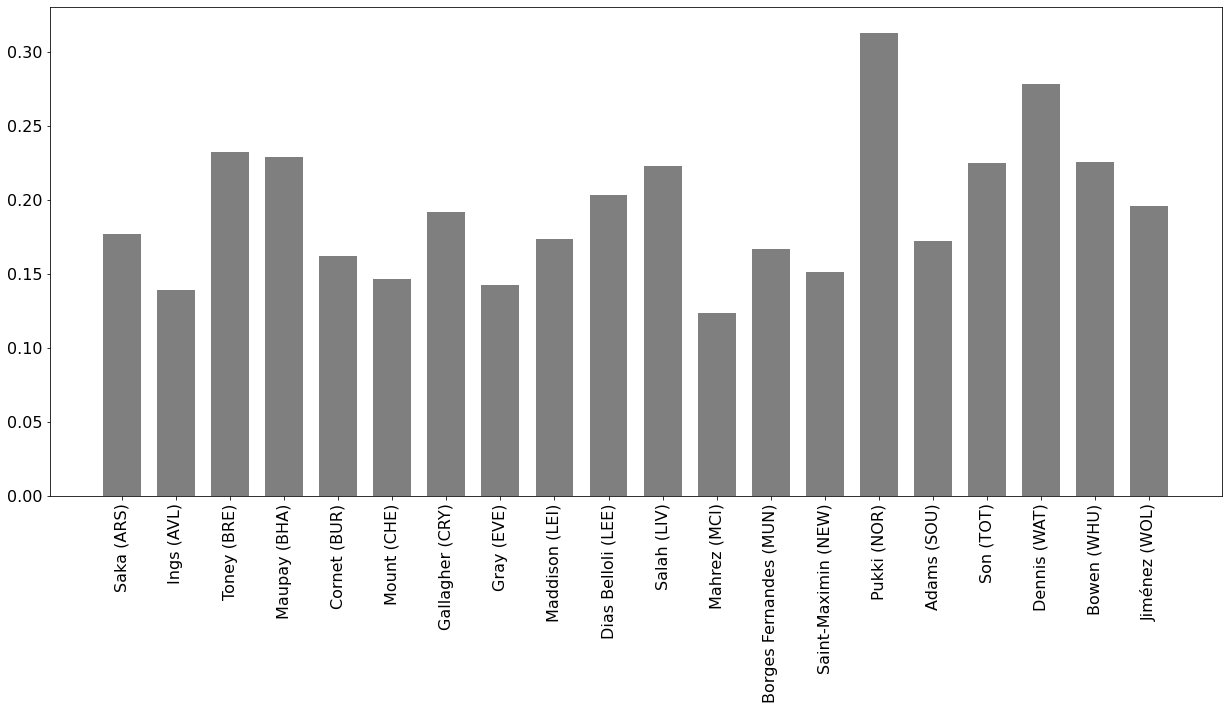

In [331]:

fig,ax = plt.subplots(figsize=(21,9))

width = 0.70
x_s = np.arange(0,len(ga_sum))

rec1 = ax.bar(x_s,top.map(lambda x: x['G+A'])/ga_sum.values,width,color='C7')

ax.set_ylim(0,0.33)
ax.set_xticks(x_s)
ax.set_xticklabels(top.map(lambda x: x['Name']) +" (" +teams['short_name']+ ")",rotation=90,fontsize=16)
ax.tick_params('y',labelsize=16)


In [14]:
print('Highest frac of team goals')

for i in range(20):
    team  = teams.iloc[(teams['TS']/teams['G']).sort_values(ascending=False).index]['short_name'].to_numpy()[i]
    print(players[players['Team']==team].sort_values('G', ascending=False).iloc[0]['Name'],
          ' ({0}): {1:.2f}'.format(team,(teams['TS']/teams['G']).sort_values(ascending=False).iloc[i]),
         ',\t Total Goals:  ', teams[teams['short_name']==team]['G'].values[0])


Highest frac of team goals
Pukki  (NOR): 0.50 ,	 Total Goals:   16
Toney  (BRE): 0.35 ,	 Total Goals:   31
Cornet  (BUR): 0.35 ,	 Total Goals:   17
Maupay  (BHA): 0.33 ,	 Total Goals:   24
Kane  (TOT): 0.32 ,	 Total Goals:   38
Dennis  (WAT): 0.31 ,	 Total Goals:   29
Dias Belloli  (LEE): 0.29 ,	 Total Goals:   31
Salah  (LIV): 0.27 ,	 Total Goals:   75
dos Santos Aveiro  (MUN): 0.26 ,	 Total Goals:   46
Vardy  (LEI): 0.25 ,	 Total Goals:   40
Zaha  (CRY): 0.23 ,	 Total Goals:   39
Jiménez  (WOL): 0.22 ,	 Total Goals:   27
Smith Rowe  (ARS): 0.21 ,	 Total Goals:   42
Adams  (SOU): 0.21 ,	 Total Goals:   34
Watkins  (AVL): 0.19 ,	 Total Goals:   37
Bowen  (WHU): 0.17 ,	 Total Goals:   46
Wilson  (NEW): 0.17 ,	 Total Goals:   35
Gray  (EVE): 0.17 ,	 Total Goals:   30
Mahrez  (MCI): 0.15 ,	 Total Goals:   66
Mount  (CHE): 0.14 ,	 Total Goals:   56


In [15]:
print('Highest frac of team fantasy points')

for i in range(20):
    team  = teams.iloc[(teams['Points']).sort_values(ascending=False).index]['short_name'].to_numpy()[i]
    player = players[players['Team']==team].sort_values('P', ascending=False).iloc[0]['Name']
    pl_pts = players[players['Team']==team].sort_values('P', ascending=False).iloc[0]['P']
    print(player,
          ' ({0}): {1:.2f}'.format(team,(pl_pts/teams['Points'].sort_values(ascending=False).iloc[i])),
         ',\t Total Pts:  ', teams[teams['short_name']==team]['Points'].values[0])

Highest frac of team fantasy points
Salah  (LIV): 0.12 ,	 Total Pts:   1804
Cancelo  (MCI): 0.09 ,	 Total Pts:   1707
Mount  (CHE): 0.08 ,	 Total Pts:   1571
Saka  (ARS): 0.10 ,	 Total Pts:   1288
Bowen  (WHU): 0.12 ,	 Total Pts:   1277
Malheiro de Sá  (WOL): 0.10 ,	 Total Pts:   1274
Son  (TOT): 0.12 ,	 Total Pts:   1263
Borges Fernandes  (MUN): 0.10 ,	 Total Pts:   1250
Gallagher  (CRY): 0.10 ,	 Total Pts:   1210
Cash  (AVL): 0.10 ,	 Total Pts:   1151
Ward-Prowse  (SOU): 0.10 ,	 Total Pts:   1084
Saint-Maximin  (NEW): 0.09 ,	 Total Pts:   1081
Toney  (BRE): 0.10 ,	 Total Pts:   1045
Maupay  (BHA): 0.09 ,	 Total Pts:   1023
Maddison  (LEI): 0.11 ,	 Total Pts:   1017
Gray  (EVE): 0.08 ,	 Total Pts:   897
Dennis  (WAT): 0.13 ,	 Total Pts:   892
Pope  (BUR): 0.10 ,	 Total Pts:   881
Dias Belloli  (LEE): 0.13 ,	 Total Pts:   864
Pukki  (NOR): 0.12 ,	 Total Pts:   840


# Homemade FDR, Home and Away separate

In [335]:
import FPLFunctions as fpl
fix_off,fix_def, fix_off_fdr, fix_def_fdr, teams = fpl.AllInOneFDR(teams, GW=31, DGWS=[21,22,23,25,26,27,28,29,31,33])

In [336]:
#To make one really bad team not stand out like crazy and make every other team "hard"
easiest_score = sorted(fix_off_fdr.max(axis=1).unique())[-2]
fix_off_fdr = fix_off_fdr.applymap(lambda x: min(x,easiest_score))
fix_off_fdr = fix_off_fdr.applymap(lambda x: np.log(x))
#easiest_score_def = sorted(fix_def_fdr.max(axis=1).unique())[-2]
#fix_def_fdr = fix_def_fdr.applymap(lambda x: min(x,easiest_score_def))
fix_def_fdr = fix_def_fdr.applymap(lambda x: np.log(x))

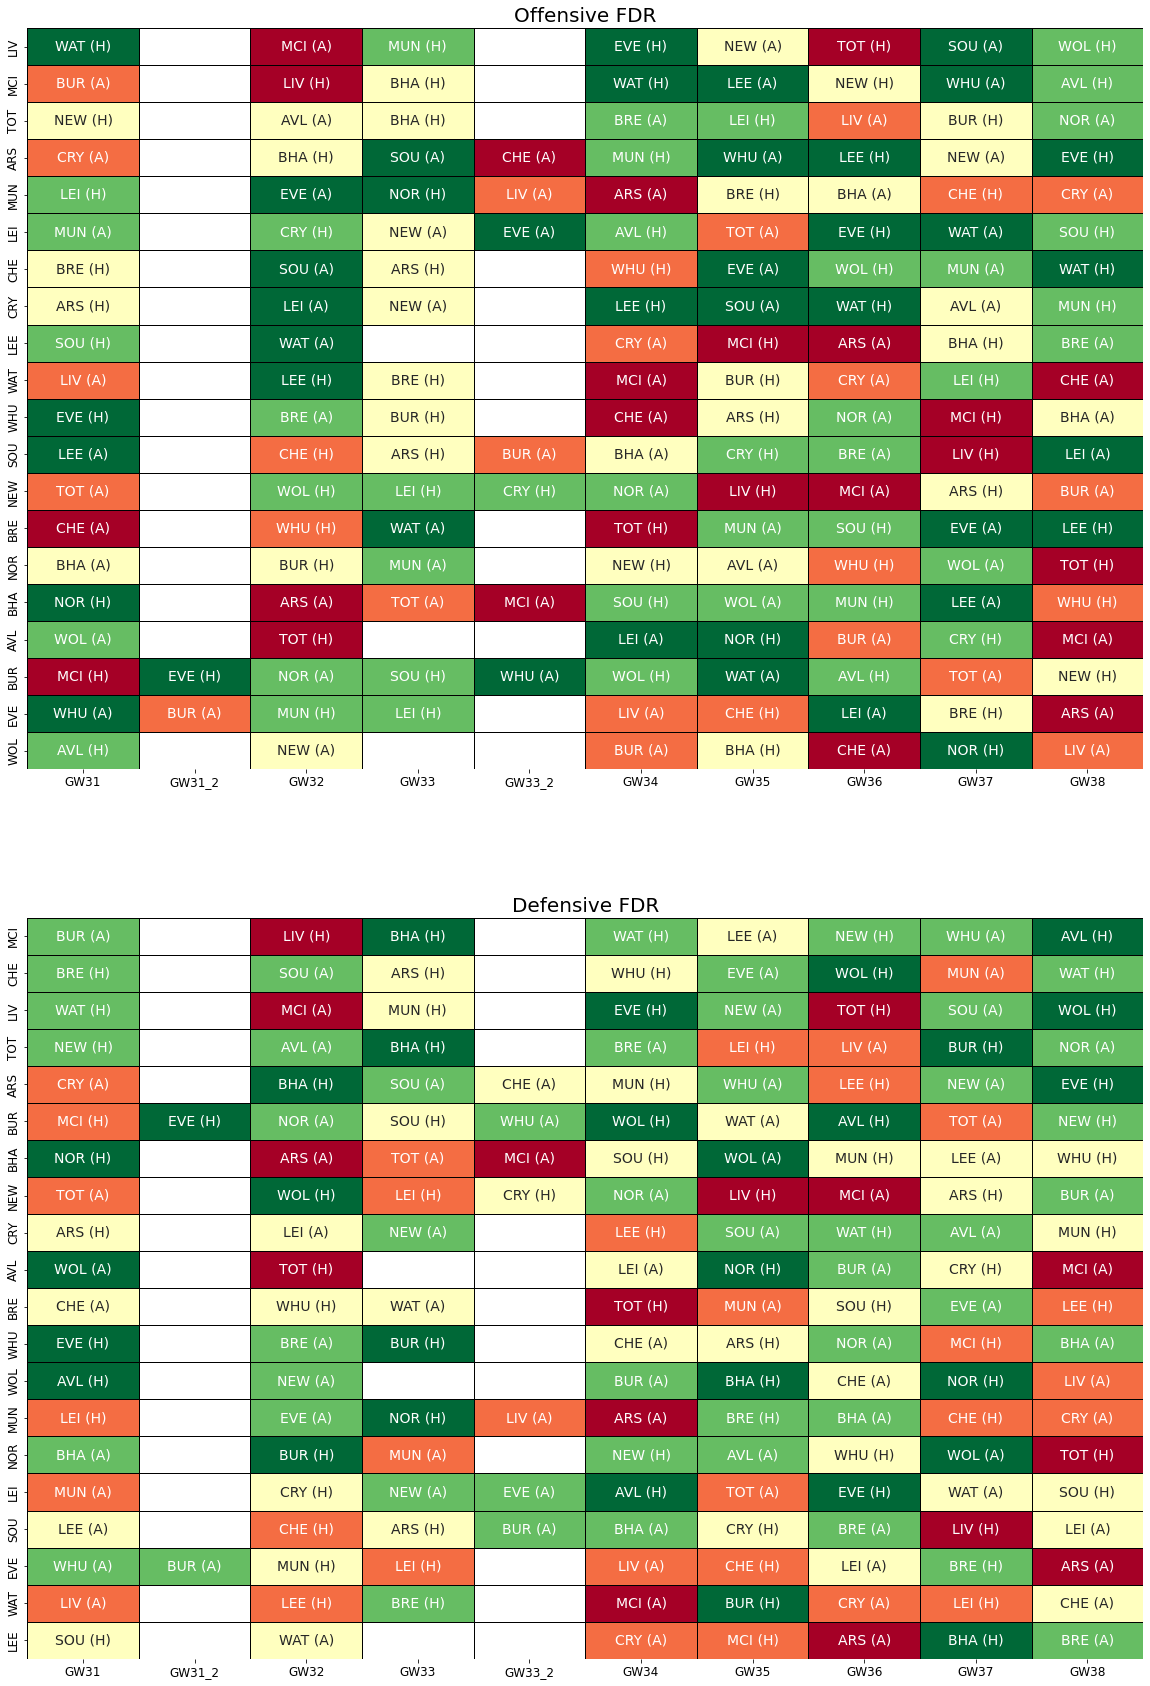

In [337]:

weeks_to_show = 20

#colors_def = ['#a50026','#f46d43','#fee08b','#ffffbf','#d9ef8b','#66bd63','#006837']

colors = ['#a50026','#f46d43','#ffffbf','#66bd63','#006837']
# red -> green

scaled_fdr_off = (fix_off_fdr-fix_off_fdr.min().min())/(fix_off_fdr.max().max()-fix_off_fdr.min().min())*7

#scaled_fdr_off = np.log(fix_off_fdr)

scaled_fdr_def = (fix_def_fdr-fix_def_fdr.min().min())/(fix_def_fdr.max().max()-fix_def_fdr.min().min())*7
scaled_fdr_def=scaled_fdr_def.max().max()-scaled_fdr_def

#scaled_fdr_def = np.log(scaled_fdr_def+0.1)

fig, ax = plt.subplots(2,1,figsize=(20,30))
sns.heatmap(scaled_fdr_off.iloc[:,:weeks_to_show],annot=fix_off.drop('name',axis=1).set_index('short_name').iloc[:,:weeks_to_show],fmt='s',
           cmap=colors, cbar=False,lw=0.5, linecolor='k', ax=ax[0], edgecolors='k',annot_kws = {'fontsize':14})

sns.heatmap(scaled_fdr_def.iloc[:,:weeks_to_show],annot=fix_def.drop('name',axis=1).set_index('short_name').iloc[:,:weeks_to_show],fmt='s',
           cmap=colors, cbar=False, linewidth=0.5, linecolor='k', ax=ax[1],edgecolors='k',annot_kws = {'fontsize':14})


ax[0].set_ylabel('')
ax[0].set_title('Offensive FDR', fontsize=20)
ax[0].set_yticklabels(scaled_fdr_off.index.values, fontsize=12)
ax[0].set_xticklabels(scaled_fdr_off.columns.values, fontsize=12)
ax[1].set_ylabel('')
ax[1].set_title('Defensive FDR', fontsize=20)
ax[1].set_yticklabels(scaled_fdr_def.index.values, fontsize=12)
ax[1].set_xticklabels(scaled_fdr_def.columns.values, fontsize=12)
plt.show()
extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('OffFDR.png', bbox_inches=extent.expanded(1.1, 1.2))
extent = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('DefFDR.png', bbox_inches=extent.expanded(1.1, 1.2))

In [ ]:
print('Best Offensive streak')
#fix_off_fdr.iloc[:,:5].mean(1).sort_values(ascending=False)[:7]

#IF DGW:
pd.concat([fix_off_fdr.iloc[:,1],fix_off_fdr.iloc[:,2:6]],axis=1).mean(1).sort_values(ascending=False)[:7]

In [ ]:
fix_off_fdr.iloc[:,:2].fillna(0).mean(axis=1).sort_values(ascending=False)

In [ ]:
print('Best defensive streak')
#scaled_fdr_def.iloc[:,:5].mean(1).sort_values(ascending=False)[:7]

#IF DGW:
pd.concat([scaled_fdr_def.iloc[:,0],scaled_fdr_def.iloc[:,2:6]],axis=1).mean(1).sort_values(ascending=False)[:7]

# Player and Team xG Stuff

In [19]:
test = 'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F9%2Fshooting%2FPremier-League-Stats&div=div_stats_shooting'

In [20]:
player_stats = pd.read_html(test, header=1)[0]
player_stats = player_stats.drop([i for i in range(25,player_stats.shape[0]+1,26)])
player_stats.iloc[:,7:25]=player_stats.iloc[:,7:25].astype(float)
player_stats = player_stats.dropna()

In [21]:
player_stats['xG/Gl'] = player_stats[(player_stats['90s']>10) & (player_stats['Gls']>0.0)]['xG']/(player_stats[(player_stats['90s']>10) & (player_stats['Gls']>0.0)]['Gls'])

In [22]:
player_stats[player_stats['Gls']>4].sort_values('xG/Gl',ascending=True).head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,xG/Gl
231,224,Reece James,eng ENG,DF,Chelsea,22-098,1999,13.1,5.0,23.0,...,4.0,0.0,0.0,2.0,2.0,0.09,3.0,3.0,Matches,0.4
461,445,Emile Smith Rowe,eng ENG,"MF,FW",Arsenal,21-231,2000,15.5,9.0,30.0,...,0.0,0.0,0.0,3.9,3.9,0.13,5.1,5.1,Matches,0.433333
94,92,Maxwel Cornet,ci CIV,"FW,MF",Burnley,25-170,1996,12.2,6.0,28.0,...,4.0,0.0,0.0,3.0,3.0,0.11,3.0,3.0,Matches,0.5
100,98,Cucho,co COL,"FW,MF",Watford,22-330,1999,11.3,5.0,32.0,...,5.0,0.0,0.0,2.5,2.5,0.08,2.5,2.5,Matches,0.5
113,110,Kevin De Bruyne,be BEL,MF,Manchester City,30-261,1991,17.1,9.0,55.0,...,3.0,0.0,0.0,4.5,4.5,0.08,4.5,4.5,Matches,0.5


In [26]:
fixes = fpl.FixtureImport(teams)
fixes_xG = fpl.FixtureImportxG(teams,30)


In [27]:
def get_xG_x_diff(team):
    print(team)
    f_xG = fixes_xG[fixes_xG['Fin']==True]
    f = fixes[fixes['Fin']==True]
    diff = 0
    for i in ['H','A']:
        diff+=np.sum(f[f[i]==team][i+'_Score'].values-f_xG[f_xG[i]==team][i+'_Score'].values)
    return diff


In [28]:
teams['G-xG']=teams['short_name'].apply(lambda x: get_xG_x_diff(x))

ARS
AVL
BRE
BHA
BUR
CHE


ValueError: operands could not be broadcast together with shapes (15,) (14,) 

In [ ]:
alt.Chart(teams,title='Goals-xG for all teams').mark_bar().encode(
    x = alt.X('short_name',axis=alt.Axis(title='Team')),
    y = 'G-xG',
    color = alt.condition(alt.datum['G-xG']>0,        
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
)


In [29]:
pts = alt.Chart(player_stats[player_stats['Gls']>2],title='Goals vs. xG for Top Scorers').mark_circle(size=80).encode(
    y = alt.Y('Gls',axis=alt.Axis(title='Goals')),
    x = alt.X('xG',axis=alt.Axis(title='xG')),
    color = alt.Color('Pos',title='Position'),
    tooltip = ['Player','Squad','Gls','xG','npxG']
)
dummy = pd.DataFrame({'x':[0,player_stats['Gls'].max()+1]})

line = alt.Chart(dummy).mark_line(opacity=0.3).encode(
    x='x',
    y='x')
both = pts + line

both

alt.LayerChart(...)

In [65]:
both.save('GvxG.html')

In [69]:
def get_xG_last_10(team, end=-1):
    f_xG = fixes_xG[fixes_xG['Fin']==True]
    f_xG = f_xG[(f_xG['H']==team) | (f_xG['A']==team)][end-10:end]
    tot_xG = 0
    for i in ['H','A']:
        tot_xG+=np.sum(f_xG[f_xG[i]==team][i+'_Score'].values)
    return tot_xG/f_xG.shape[0]

def get_Goals_for_game(team, game=-1):
    f = fixes[fixes['Fin']==True]
    f = f[(f['H']==team) | (f['A']==team)]
    f = f.iloc[game]
    return f['H_Score'] if f['H']==team else f['A_Score']

In [70]:
teams['Avg_xG_before_last'] = teams['short_name'].apply(lambda x: get_xG_last_10(x))
teams['Goals_Last_Game'] = teams['short_name'].apply(lambda x: get_Goals_for_game(x))

In [71]:
df_xG_G = pd.DataFrame()
MIN_PLAYED = 22

for team in teams['short_name'].values:
    xG = [get_xG_last_10(team, end=i) for i in range(-(MIN_PLAYED-11),0)]
    G = [get_Goals_for_game(team, game=i) for i in range(-(MIN_PLAYED-11),0)]
    df_xG_G[team+'_xG'] = xG
    df_xG_G[team+'_G'] = G
    

In [81]:
goals_df = pd.DataFrame()
for team in teams['short_name'].values:
    goals_pr_week = [get_Goals_for_game(team, game=i) for i in range(-MIN_PLAYED,0)]
    goals_df[team] = goals_pr_week

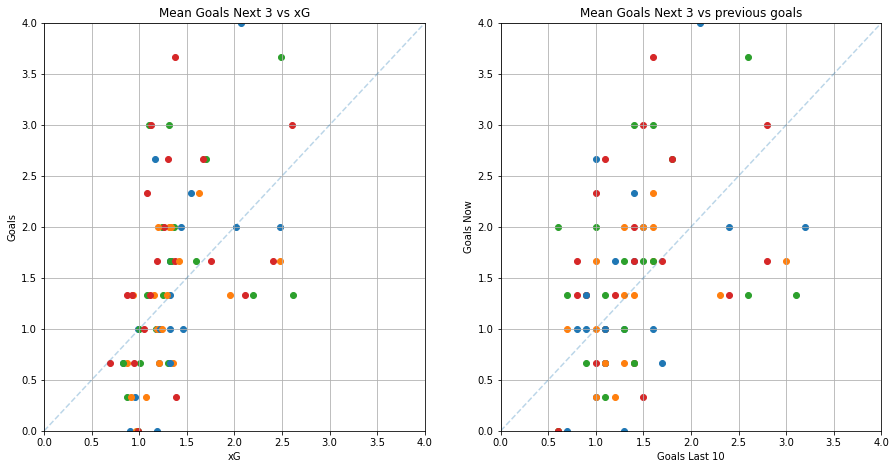

Pearson Correlation
xG: 0.51, with p-value 1.02e-06
Goals: 0.43, with p-value 7.37e-05
Spearman Correlation
xG: 0.58, with p-value 1.64e-08
Goals: 0.48, with p-value 5.36e-06


In [94]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
avg_xG_first_games = []
avg_goals_last_games = []
avg_goals_first_games = []

for t in teams['short_name'].values:
    for i in range(4):
        ax[0].scatter(df_xG_G[t+'_xG'][i],np.mean(df_xG_G.loc[i:i+2,t+'_G']),color='C'+str(i))
        ax[1].scatter(np.mean(goals_df.loc[1+i:10+i,t]),np.mean(goals_df.loc[11+i:13+i,t]),color='C'+str(i))
        avg_goals_first_games.append(np.mean(goals_df.loc[1+i:10+i,t]))
        avg_xG_first_games.append(df_xG_G[t+'_xG'][i])
        avg_goals_last_games.append(np.mean(df_xG_G.loc[i:i+2,t+'_G']))
    #print(sp.stats.pearsonr(df_xG_G[t+'_xG'],df_xG_G[t+'_G'])[0])

for i in range(2):
    ax[i].plot([0,4],[0,4],'--',alpha=0.3)
    ax[i].set_xlim(0,4)
    ax[i].set_ylim(0,4)
    ax[i].grid()

ax[0].set_xlabel('xG')
ax[0].set_ylabel('Goals')
ax[0].set_title('Mean Goals Next 3 vs xG')
ax[1].set_xlabel('Goals Last 10')
ax[1].set_ylabel('Goals Now')
ax[1].set_title('Mean Goals Next 3 vs previous goals')


plt.show()

print('Pearson Correlation')
print('xG: {0:.2f}, with p-value {1:.2e}'.format(sp.stats.pearsonr(avg_xG_first_games,avg_goals_last_games)[0],
                                                         sp.stats.pearsonr(avg_xG_first_games,avg_goals_last_games)[1]))
print('Goals: {0:.2f}, with p-value {1:.2e}'.format(sp.stats.pearsonr(avg_goals_first_games,avg_goals_last_games)[0],
                                                         sp.stats.pearsonr(avg_goals_first_games,avg_goals_last_games)[1]))

xG_spearman_r, xG_spearman_p = sp.stats.spearmanr(avg_xG_first_games,avg_goals_last_games)
G_spearman_r, G_spearman_p = sp.stats.spearmanr(avg_goals_first_games,avg_goals_last_games)
print('Spearman Correlation')
print('xG: {0:.2f}, with p-value {1:.2e}'.format(xG_spearman_r, xG_spearman_p))
print('Goals: {0:.2f}, with p-value {1:.2e}'.format(G_spearman_r, G_spearman_p))

In [349]:
ps = player_stats[player_stats['Pos'].apply(lambda x: player_stats['Pos'].value_counts()[x]>10)]

In [351]:
ps.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches',
       'xG/Gl'],
      dtype='object')

In [331]:
print(ps.shape)
ps = ps[ps['90s'].astype(float)>13]
ps.loc[:,'Pos'] = ps.loc[:,'Pos'].where((ps['Pos']!='MF,FW'),other='MW')
ps.loc[:,'Pos'] = ps.loc[:,'Pos'].where((ps['Pos']!='FW,MF'),other='MW')
ps.loc[:,'Sh']=ps['Sh'].astype(float)
ps = ps[['Pos','Sh','Squad']]
#ps = ps[ps['SoT']>5]
#ps = ps[ps['SoT']<20]
print(ps.shape)

(322, 27)
(166, 3)


In [336]:
ps = pd.merge(ps,ps.groupby('Pos').mean().reset_index(),on='Pos', suffixes =['','_mean'])
ps = pd.merge(ps,ps.groupby('Squad').mean().reset_index()[['Squad','Sh']],on='Squad', suffixes =['','_sq_mean'])

In [337]:
ps.head(5)

,Pos,Sh,Squad,Sh_mean,Sh_sq_mean
0,DF,10.0,Norwich City,13.223881,18.444444
1,DF,8.0,Norwich City,13.223881,18.444444
2,DF,12.0,Norwich City,13.223881,18.444444
3,FW,34.0,Norwich City,44.482759,18.444444
4,MF,9.0,Norwich City,22.953488,18.444444


array([[<AxesSubplot:title={'center':'Sh'}>]], dtype=object)

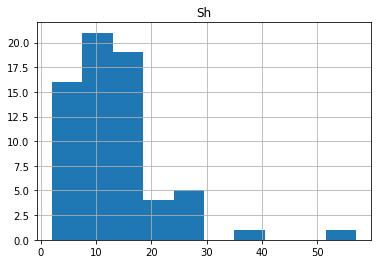

In [318]:
ps[ps['Pos']=='DF'].hist('Sh')

In [348]:
ps.Sh_sq_mean.unique().max()

39.44444444444444

In [343]:
step=20
overlap=3

grp = 'Squad'
rel_mean = 'Sh_sq_mean'

alt.Chart(ps,height=step,width=300).transform_bin(
    ['bin_max','bin_min'],'Sh'
).transform_aggregate(
    value='count()',groupby=[grp,rel_mean,'bin_min','bin_max']
).transform_impute(
    impute='value', groupby=[grp, rel_mean], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8, stroke='lightgray',strokeWidth=0.5
).encode(alt.X('bin_min:Q',bin='binned',title='Shots on Target'),
        alt.Y('value:Q',scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
             ),
    alt.Fill(rel_mean+':Q',legend=None,scale=alt.Scale(domain=[45,13], scheme='redyellowblue')
            )
        ).facet(
    row=alt.Row(
        grp,
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right')
    )
).properties(
    title='Shots On Target',
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)





alt.FacetChart(...)

In [352]:
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

In [364]:
alt.Chart(counties,height=400,width=500).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source,'id',['rate'])
).project('albersUsa')

alt.Chart(...)